<a href="https://colab.research.google.com/github/HIGIRO1234/formativeOne_data_sets/blob/main/Formative_one_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [6]:
# Load the dataset from GitHub
url = "https://raw.githubusercontent.com/HIGIRO1234/formativeOne_data_sets/main/african-economic-outlook.csv"
data = pd.read_csv(url)
data.head()


,Country and Regions,Country and Regions Name,Country and Regions - RegionId,Indicators,Indicators Name,Scale,Units,1980,1981,1982,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,DZA,Algeria,DZ,NY.GDP.MKTP.KD.ZG,Real GDP growth (annual %),units,percentage,NaN,3.000005,6.400001,...,2.900000,3.400000,2.800000,3.800000,3.700000,3.200000,1.400000,2.544479,2.689753,1.867171
1,DZA,Algeria,DZ,NY.GDP.PCAP.KD.ZG,Real per Capita GDP Growth Rate (annual %),units,percentage,NaN,-0.129448,3.131644,...,0.938334,1.345839,0.728063,1.743944,1.727994,1.333212,-0.347560,0.860358,1.075350,0.329201
2,DZA,Algeria,DZ,NY.GDP.MKTP.KD,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,34512.329728,35547.701326,37822.754445,...,82306.010060,85104.414402,87487.338005,90811.856849,94171.895553,97185.396210,98545.991757,101053.473884,103771.562863,105709.155649
3,DZA,Algeria,DZ,NY.GDP.MKTP.CD,"Gross domestic product, current prices (curren...",millions,U.S. dollars,42345.827687,44371.759808,44779.983360,...,200019.103013,209059.083118,209755.003251,213809.978239,165967.810237,160132.094556,167552.812075,181354.494429,187422.917508,193705.489155
4,DZA,Algeria,DZ,NE.CON.TETC.CD,Final consumption expenditure (current US$),millions,U.S. dollars,24112.626875,26305.606595,27485.578776,...,103696.510707,109684.113910,112849.091074,120060.948870,103851.459393,102155.457084,104656.071799,110184.109060,113666.188267,117069.974688


In [7]:
# Display information about the dataset

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732 entries, 0 to 1731
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country and Regions             1731 non-null   object 
 1   Country and Regions Name        1731 non-null   object 
 2   Country and Regions - RegionId  1526 non-null   object 
 3   Indicators                      1729 non-null   object 
 4   Indicators Name                 1729 non-null   object 
 5   Scale                           1729 non-null   object 
 6   Units                           1729 non-null   object 
 7   1980                            1391 non-null   float64
 8   1981                            1562 non-null   float64
 9   1982                            1563 non-null   float64
 10  1983                            1565 non-null   float64
 11  1984                            1565 non-null   float64
 12  1985                            15

In [8]:
# Count the number of missing values in each column
# This confirms that the dataset satisfies the assignment requirement

data.isnull().sum()


,0
Country and Regions,1
Country and Regions Name,1
Country and Regions - RegionId,206
Indicators,3
Indicators Name,3
Scale,3
Units,3
1980,341
1981,170
1982,169


In [9]:
# PCA only works on numerical data
# Non-numeric columns (e.g., country names) are excluded

numeric_df = data.select_dtypes(include=[np.number])
categorical_df = data.select_dtypes(exclude=[np.number])

# Display numeric data preview
numeric_df.head()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,3.000005,6.400001,5.399997,5.599997,5.600001,-0.200000,-0.699999,-1.899998,4.799998,...,2.900000,3.400000,2.800000,3.800000,3.700000,3.200000,1.400000,2.544479,2.689753,1.867171
1,NaN,-0.129448,3.131644,2.159850,2.389801,2.455049,-3.100083,-3.509145,-4.587092,2.035861,...,0.938334,1.345839,0.728063,1.743944,1.727994,1.333212,-0.347560,0.860358,1.075350,0.329201
2,34512.329728,35547.701326,37822.754445,39865.182044,42097.631173,44455.099094,44366.189082,44055.626377,43218.570561,45293.061095,...,82306.010060,85104.414402,87487.338005,90811.856849,94171.895553,97185.396210,98545.991757,101053.473884,103771.562863,105709.155649
3,42345.827687,44371.759808,44779.983360,47528.985113,51512.786466,61132.078620,61535.270441,63299.597415,51664.192501,52558.285689,...,200019.103013,209059.083118,209755.003251,213809.978239,165967.810237,160132.094556,167552.812075,181354.494429,187422.917508,193705.489155
4,24112.626875,26305.606595,27485.578776,29417.599399,33149.254420,36927.483193,44511.092397,43894.703634,47209.375851,44198.245134,...,103696.510707,109684.113910,112849.091074,120060.948870,103851.459393,102155.457084,104656.071799,110184.109060,113666.188267,117069.974688


In [10]:
# Replace missing values with the mean of each column
# This is a common and mathematically valid preprocessing step for PCA

numeric_df = numeric_df.fillna(numeric_df.mean())

# Verify that missing values have been handled
numeric_df.isnull().sum()


,0
1980,0
1981,0
1982,0
1983,0
1984,0
1985,0
1986,0
1987,0
1988,0
1989,0


In [11]:
# Convert DataFrame to NumPy array
X = numeric_df.values

# Center the data by subtracting the mean of each feature
# This ensures that PCA captures variance correctly

X_meaned = X - np.mean(X, axis=0)


In [12]:
# Compute the covariance matrix
# Covariance describes how features vary together

cov_matrix = np.cov(X_meaned, rowvar=False)

# Display the covariance matrix
cov_matrix


array([[5.19426932e+08, 5.27823625e+08, 5.21190664e+08, ...,
        2.66812463e+09, 2.82390743e+09, 3.01316513e+09],
       [5.27823625e+08, 5.41908345e+08, 5.34880390e+08, ...,
        2.74192431e+09, 2.90149300e+09, 3.09616687e+09],
       [5.21190664e+08, 5.34880390e+08, 5.29661910e+08, ...,
        2.69357013e+09, 2.84950563e+09, 3.04000082e+09],
       ...,
       [2.66812463e+09, 2.74192431e+09, 2.69357013e+09, ...,
        1.51157010e+10, 1.60352796e+10, 1.71675279e+10],
       [2.82390743e+09, 2.90149300e+09, 2.84950563e+09, ...,
        1.60352796e+10, 1.70176205e+10, 1.82249076e+10],
       [3.01316513e+09, 3.09616687e+09, 3.04000082e+09, ...,
        1.71675279e+10, 1.82249076e+10, 1.95240449e+10]])

In [13]:
# Perform eigendecomposition of the covariance matrix
# Eigenvalues represent variance explained
# Eigenvectors represent directions of maximum variance

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Convert complex values (if any) to real numbers
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)


In [14]:
# Sort eigenvalues in descending order
# This ensures that the most important principal components come first

sorted_indices = np.argsort(eigenvalues)[::-1]

sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]


In [15]:
# Select the number of principal components manually
k = 2

# Select the top k eigenvectors
principal_components = sorted_eigenvectors[:, :k]

# Project the centered data onto the principal components
X_reduced = np.dot(X_meaned, principal_components)

# Display reduced data
X_reduced


array([[-8.62537888e+04, -1.38056609e+03],
       [-8.62634860e+04, -1.38791398e+03],
       [ 3.19063698e+05,  1.27084633e+05],
       ...,
       [-3.39072592e-12,  1.04628280e-12],
       [-3.39072592e-12,  1.04628280e-12],
       [-3.39072592e-12,  1.04628280e-12]])

In [16]:
# Calculate the explained variance ratio
# This shows how much variance each component explains

explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

explained_variance_ratio, cumulative_variance


(array([9.82497030e-01, 1.03716132e-02, 3.02093586e-03, 1.89235793e-03,
        7.88559376e-04, 5.80892020e-04, 2.03142945e-04, 1.69483013e-04,
        9.74059180e-05, 7.66383174e-05, 7.49681214e-05, 4.42943390e-05,
        4.38798130e-05, 3.06099071e-05, 1.80999628e-05, 1.51861481e-05,
        1.21873124e-05, 1.12637513e-05, 8.83301921e-06, 7.20713577e-06,
        5.95088022e-06, 5.37390048e-06, 3.86656268e-06, 3.35040024e-06,
        3.00202852e-06, 2.54980911e-06, 1.73454829e-06, 1.46482616e-06,
        1.29413957e-06, 1.26028623e-06, 1.09598592e-06, 9.66986874e-07,
        6.97826421e-07, 6.08104281e-07, 5.55096327e-07, 4.08998469e-07,
        3.37585539e-07, 3.02229953e-07, 2.55559192e-07, 1.96814559e-07,
        1.39321669e-07]),
 array([0.98249703, 0.99286864, 0.99588958, 0.99778194, 0.9985705 ,
        0.99915139, 0.99935453, 0.99952401, 0.99962142, 0.99969806,
        0.99977303, 0.99981732, 0.9998612 , 0.99989181, 0.99990991,
        0.9999251 , 0.99993728, 0.99994855, 0.9999

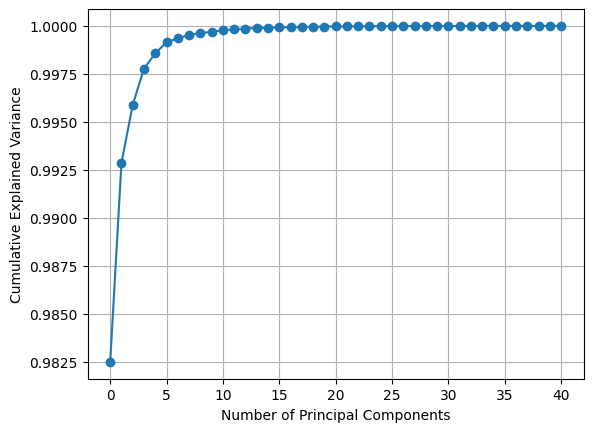

In [17]:
# Plot cumulative explained variance to visualize
# how many components are needed

plt.figure()
plt.plot(cumulative_variance, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()


In [18]:
# Automatically select the number of components
# that retain at least 95% of the total variance

threshold = 0.95
k_dynamic = np.argmax(cumulative_variance >= threshold) + 1

k_dynamic


np.int64(1)

In [19]:
# Select eigenvectors dynamically based on variance threshold
principal_components_dynamic = sorted_eigenvectors[:, :k_dynamic]

# Efficient matrix multiplication for projection
X_reduced_dynamic = X_meaned @ principal_components_dynamic

# Display shape of reduced dataset
X_reduced_dynamic.shape


(1732, 1)